In [1]:
import numpy as np
import os
from scipy.stats import expon, uniform, beta
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time
from joblib import cpu_count
import networkx as nx
import pickle

from InfluenceDiffusion.estimation_models.OptimEstimation import GLTWeightEstimator
from InfluenceDiffusion.weight_samplers import make_random_weights_with_indeg_constraint
from InfluenceDiffusion.influence_models import GLTM
from InfluenceDiffusion.Graph import Graph

os.chdir("/Users/amkagan/Desktop/gltm_experiments")

from utils.trace_utils import make_report_traces
from utils.utils import RMAE, make_name_from_dict, plot_distribution

print("CPUs available", cpu_count())

CPUs available 8


In [2]:
n_nodes = 100

p = 0.1

g_nx = nx.erdos_renyi_graph(n_nodes, p=p, directed=True)
g = Graph(g_nx.edges)

weights = make_random_weights_with_indeg_constraint(g, indeg_ub=1)                       
g.set_weights(weights)

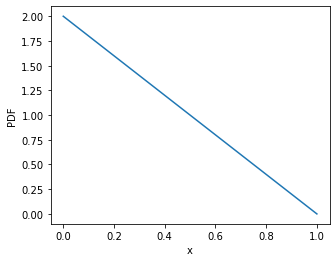

In [3]:
threshold_generator = beta(1, 2)
vertex_2_distrib = {v: threshold_generator for v in g.get_vertices()}

plt.figure(figsize=(5, 4))
plot_distribution(threshold_generator)

In [4]:
seed_size_range = range(1, 6)
n_traces = 1000

gltm = GLTM(g, threshold_distribs=vertex_2_distrib)

%time traces = gltm.sample_traces(n_traces, seed_size_range=seed_size_range)

CPU times: user 751 ms, sys: 4.75 ms, total: 755 ms
Wall time: 756 ms


In [6]:
glt_estimator = GLTWeightEstimator(g, vertex_2_distrib=vertex_2_distrib, n_jobs=8)
%time  weights_pred = glt_estimator.fit(traces)

CPU times: user 4.33 s, sys: 190 ms, total: 4.52 s
Wall time: 5.59 s


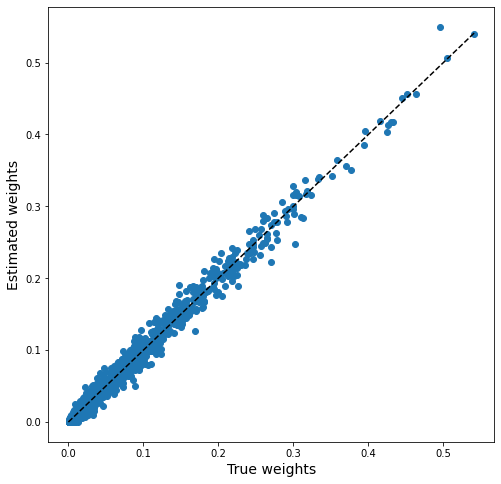

In [7]:
true_linsapce = np.linspace(0, max(weights), 100)
plt.figure(figsize=(8, 8))
plt.scatter(weights, weights_pred)
plt.plot(true_linsapce, true_linsapce, c="black", linestyle="dashed")
plt.xlabel("True weights", fontsize=14)
plt.ylabel("Estimated weights", fontsize=14)
plt.show()